In [1]:
### Setup Environment ###
import numpy as np
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import chi2_contingency
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from itertools import combinations

np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.4f}'.format})
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('matchups_15.csv')
df = df[df['round'] == 'First Round']
print(df.shape)
df.head()

(478, 79)


,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,wab,kenpom_adjem,...,D_D,D_F,F_S,F_A,F_B,F_C,F_D,F_F,Unnamed: 77,Unnamed: 78
0,2009,Midwest,First Round,1,2009 Louisville,16,2009 Morehead St.,1,17.2039,25.3847,...,0,0,0,0,0,0,0,0,NaN,NaN
2,2009,Midwest,First Round,8,2009 Ohio St.,9,2009 Siena,0,2.9527,4.7910,...,0,0,0,0,0,0,0,0,NaN,NaN
4,2009,Midwest,First Round,5,2009 Utah,12,2009 Arizona,0,2.0347,3.0248,...,0,0,0,0,0,0,0,0,NaN,NaN
8,2009,Midwest,First Round,4,2009 Wake Forest,13,2009 Cleveland St.,0,6.4159,8.5948,...,0,0,0,0,0,0,0,0,NaN,NaN
10,2009,Midwest,First Round,6,2009 West Virginia,11,2009 Dayton,0,2.6652,15.6125,...,0,0,0,0,0,0,0,0,NaN,NaN


In [2]:
df['win'].value_counts(normalize=True)

1   0.7071
0   0.2929
Name: win, dtype: float64

In [3]:
df.columns

Index(['year', 'region', 'round', 'high_bracket_seed', 'high_bracket_team',
       'low_bracket_seed', 'low_bracket_team', 'win', 'wab', 'kenpom_adjem',
       'kenpom_adjoe', 'kenpom_adjde', 'barthag', 'barthag_oe', 'barthag_de',
       'off_eff', 'def_eff', 'efg%', 'ftr', 'tor', 'orb%', 'efgd%', 'ftrd',
       'tord', 'drb%', '2p%', '3p%', 'blked%', 'ast%', '3pr', 'ft%', '2p%d',
       '3p%d', 'blk%', 'ast%d', '3prd', 'ft%d', 'height', 'size', 'experience',
       'bench', 'S_S', 'S_A', 'S_B', 'S_C', 'S_D', 'S_F', 'A_S', 'A_A', 'A_B',
       'A_C', 'A_D', 'A_F', 'B_S', 'B_A', 'B_B', 'B_C', 'B_D', 'B_F', 'C_S',
       'C_A', 'C_B', 'C_C', 'C_D', 'C_F', 'D_S', 'D_A', 'D_B', 'D_C', 'D_D',
       'D_F', 'F_S', 'F_A', 'F_B', 'F_C', 'F_D', 'F_F', 'Unnamed: 77',
       'Unnamed: 78'],
      dtype='object')

In [4]:
eda_df = df[[
    'win', 
    'wab', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'tor', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'tord', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    'ft%', 
    '2p%d',
    '3p%d', 
    'blk%', 
    'ast%d', 
    '3prd', 
    'ft%d', 
    'height', 
    'size', 
    'experience',
    'bench', 
    'S_S', 
    'S_A', 
    'S_B', 
    'S_C', 
    'S_D',
    'S_F', 
    'A_S', 
    'A_A', 
    'A_B', 
    'A_C', 
    'A_D', 
    'A_F', 
    'B_S', 
    'B_A', 
    'B_B',
    'B_C', 
    'B_D', 
    'B_F', 
    'C_S', 
    'C_A', 
    'C_B', 
    'C_C', 
    'C_D', 
    'C_F', 
    'D_S',
    'D_A', 
    'D_B', 
    'D_C', 
    'D_D', 
    'D_F', 
    'F_S', 
    'F_A', 
    'F_B', 
    'F_C', 
    'F_D',
    'F_F']]

In [5]:
# Split dataset into a train and test set
X = eda_df.iloc[:,1:]
Y = eda_df['win']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(train_df.shape)
print(test_df.shape)

(334, 70)
(144, 70)


In [6]:
train_cat = train_df[[
    'win',
    'S_S', 
    'S_A', 
    'S_B', 
    'S_C', 
    'S_D',
    'S_F', 
    'A_S', 
    'A_A', 
    'A_B', 
    'A_C', 
    'A_D', 
    'A_F', 
    'B_S', 
    'B_A', 
    'B_B',
    'B_C', 
    'B_D', 
    'B_F', 
    'C_S', 
    'C_A', 
    'C_B', 
    'C_C', 
    'C_D', 
    'C_F', 
    'D_S',
    'D_A', 
    'D_B', 
    'D_C', 
    'D_D', 
    'D_F', 
    'F_S', 
    'F_A', 
    'F_B', 
    'F_C', 
    'F_D',
    'F_F']]

train_num = train_df[[
    'win', 
    'wab', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'tor', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'tord', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    'ft%', 
    '2p%d',
    '3p%d', 
    'blk%', 
    'ast%d', 
    '3prd', 
    'ft%d', 
    'height', 
    'size', 
    'experience',
    'bench']]

### I. Categorical Variables

In [7]:
s_tiers = train_cat[[
 'S_S',
 'S_A',
 'S_B',
 'S_C',
 'S_D',
 'S_F']]
print(s_tiers.value_counts())
a_tiers = train_cat[[
 'A_S',
 'A_A',
 'A_B',
 'A_C',
 'A_D',
 'A_F']]
print(a_tiers.value_counts())
b_tiers = train_cat[[
 'B_S',
 'B_A',
 'B_B',
 'B_C',
 'B_D',
 'B_F']]
print(b_tiers.value_counts())
c_tiers = train_cat[[
 'C_S',
 'C_A',
 'C_B',
 'C_C',
 'C_D',
 'C_F']]
print(c_tiers.value_counts())
d_tiers = train_cat[[
 'D_S',
 'D_A',
 'D_B',
 'D_C',
 'D_D',
 'D_F']]
print(d_tiers.value_counts())
f_tiers = train_cat[[
 'F_S',
 'F_A',
 'F_B',
 'F_C',
 'F_D',
 'F_F']]
print(f_tiers.value_counts())

S_S  S_A  S_B  S_C  S_D  S_F
0    0    0    0    0    0      274
                         1       47
                    1    0       12
          1    0    0    0        1
dtype: int64
A_S  A_A  A_B  A_C  A_D  A_F
0    0    0    0    0    0      243
                         1       43
                    1    0       28
               1    0    0       16
          1    0    0    0        3
     1    0    0    0    0        1
dtype: int64
B_S  B_A  B_B  B_C  B_D  B_F
0    0    0    0    0    0      225
               1    0    0       37
               0    1    0       32
          1    0    0    0       19
          0    0    0    1       18
     1    0    0    0    0        3
dtype: int64
C_S  C_A  C_B  C_C  C_D  C_F
0    0    0    0    0    0      263
               1    0    0       43
               0    1    0       13
          1    0    0    0       10
          0    0    0    1        3
     1    0    0    0    0        2
dtype: int64
D_S  D_A  D_B  D_C  D_D  D_F
0    0    0

In [8]:
# Remove all tier matchups that happened five or less times and view win percentage of the the remaining tiers
all_tiers = train_cat[[
 'win',
'S_D',
'S_F',
'A_C',
'A_D',
'A_F',
'B_C',
'B_D',
'B_F',
'C_D',
'C_F']]

In [9]:
all_tiers.groupby(by=['win', 'S_D']).size()

win  S_D
0    0      100
     1        3
1    0      222
     1        9
dtype: int64

In [10]:
all_tiers.groupby(by=['win', 'S_F']).size()

win  S_F
0    0      103
1    0      184
     1       47
dtype: int64

In [11]:
all_tiers.groupby(by=['win', 'A_C']).size()

win  A_C
0    0      101
     1        2
1    0      217
     1       14
dtype: int64

In [12]:
all_tiers.groupby(by=['win', 'A_D']).size()

win  A_D
0    0       98
     1        5
1    0      208
     1       23
dtype: int64

In [13]:
all_tiers.groupby(by=['win', 'A_F']).size()

win  A_F
0    0       96
     1        7
1    0      195
     1       36
dtype: int64

In [14]:
all_tiers.groupby(by=['win', 'B_C']).size()

win  B_C
0    0       85
     1       18
1    0      212
     1       19
dtype: int64

In [15]:
all_tiers.groupby(by=['win', 'B_D']).size()

win  B_D
0    0       91
     1       12
1    0      211
     1       20
dtype: int64

In [16]:
all_tiers.groupby(by=['win', 'B_F']).size()

win  B_F
0    0      101
     1        2
1    0      215
     1       16
dtype: int64

In [17]:
all_tiers.groupby(by=['win', 'C_D']).size()

win  C_D
0    0       97
     1        6
1    0      224
     1        7
dtype: int64

In [18]:
all_tiers.groupby(by=['win', 'C_F']).size()

win  C_F
0    0      103
1    0      228
     1        3
dtype: int64

### II. Numerical Tests

/var/folders/nd/7h3lcr8d2cjbxfmfqghczqz40000gn/T/ipykernel_88175/3841579261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])


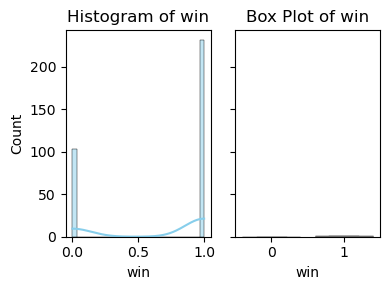

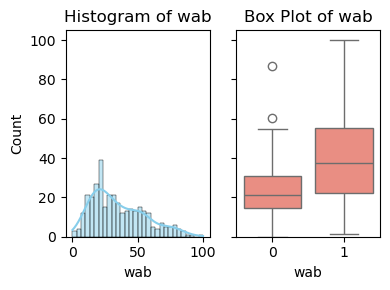

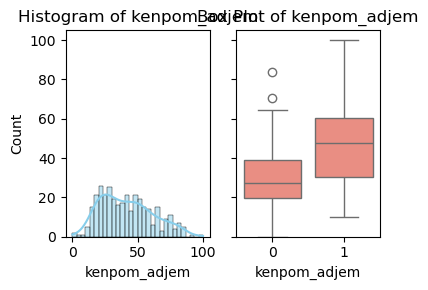

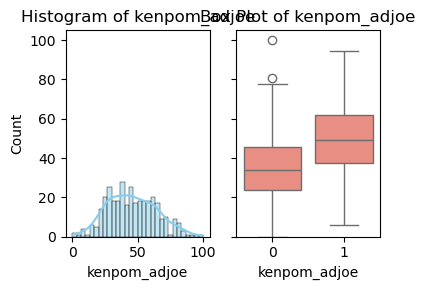

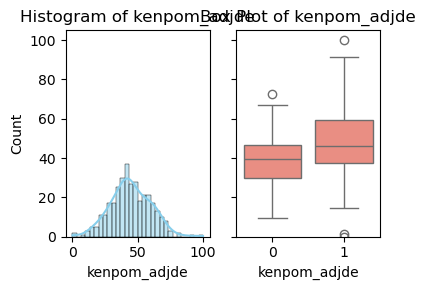

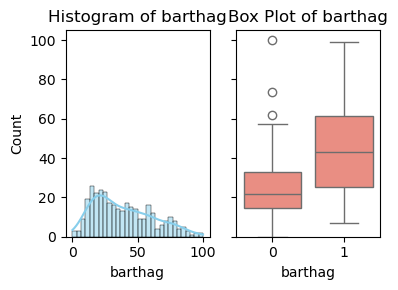

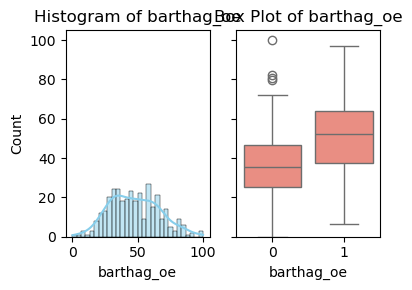

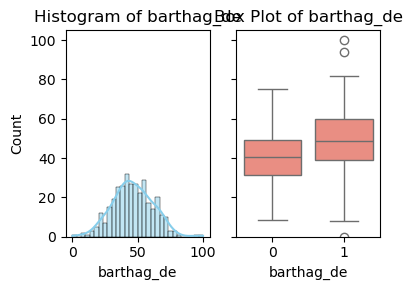

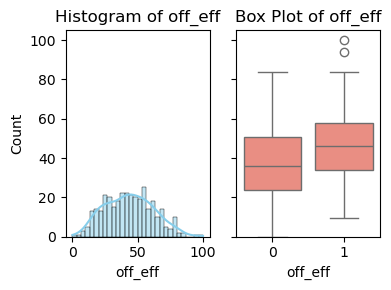

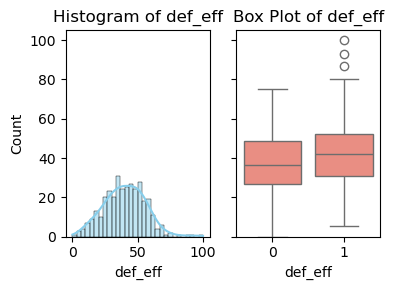

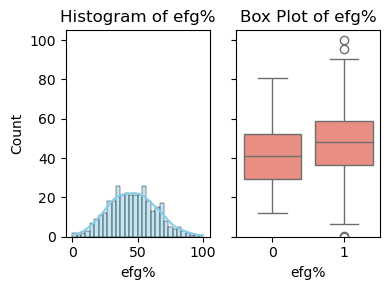

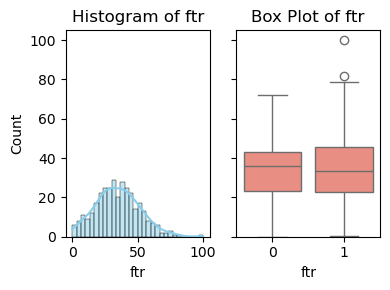

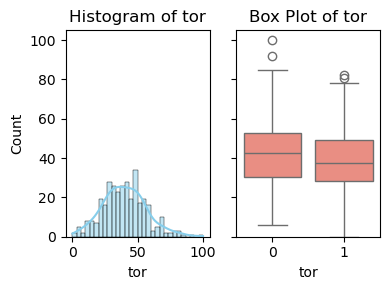

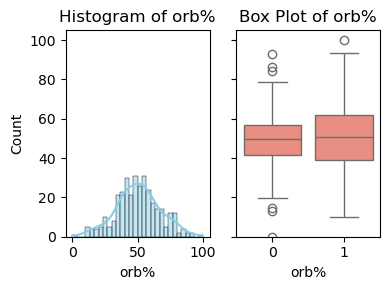

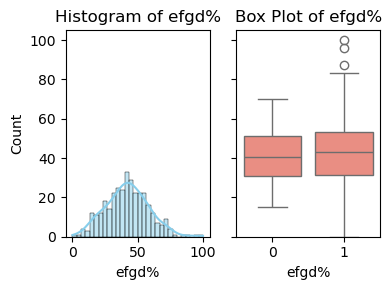

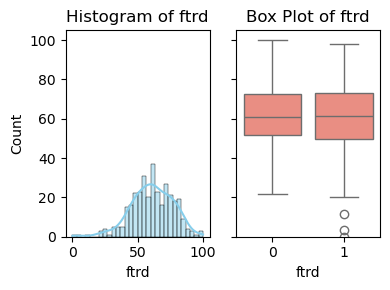

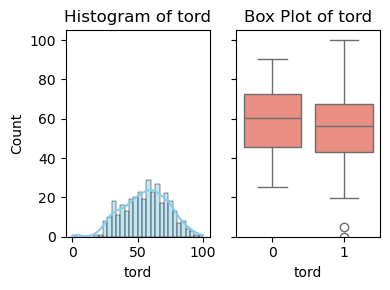

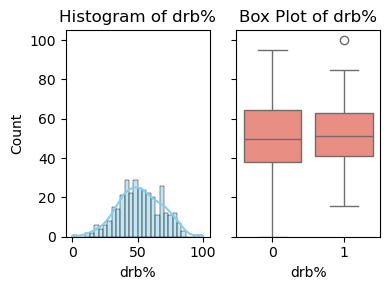

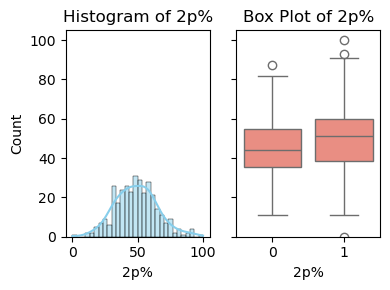

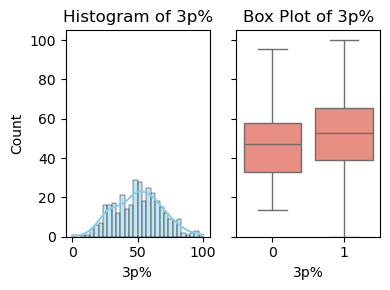

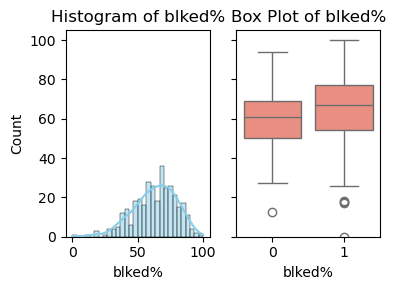

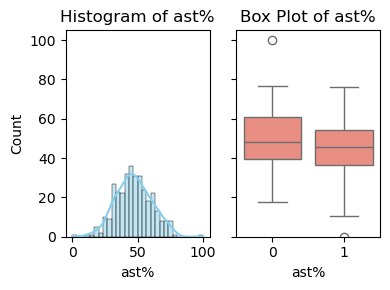

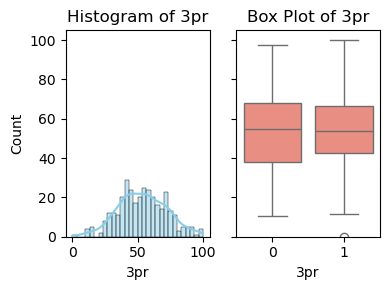

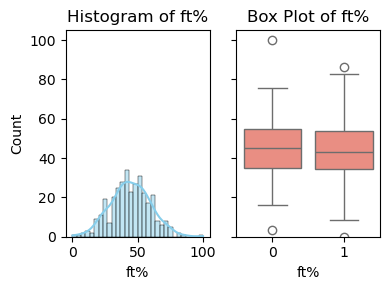

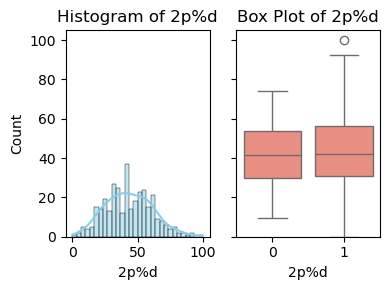

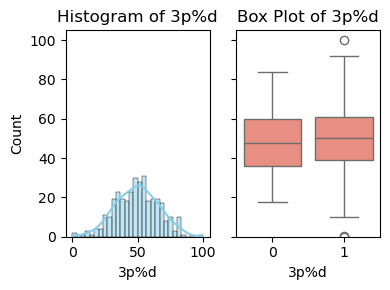

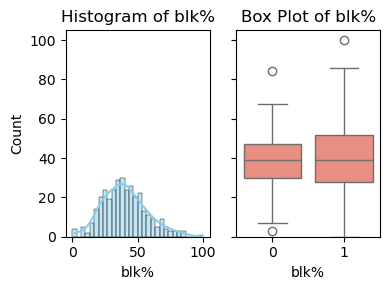

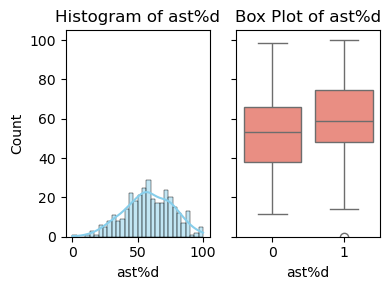

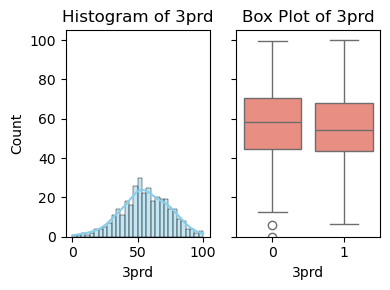

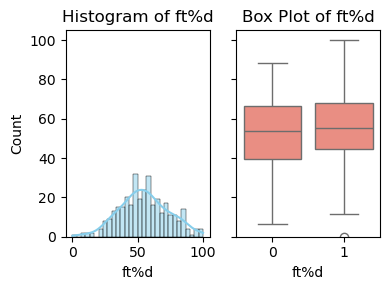

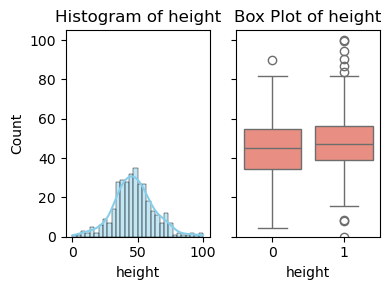

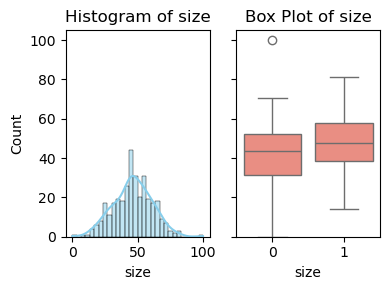

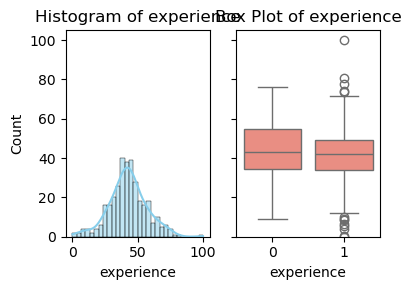

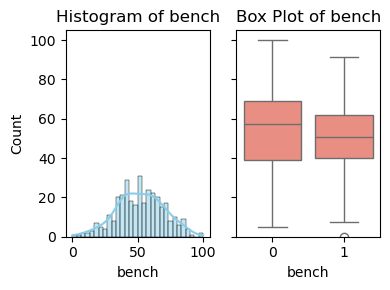

In [19]:
scaler = MinMaxScaler(feature_range=(0,100))
box_df = train_num
numeric_columns = train_num.drop(columns=['win']).columns
box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])

for column in box_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(4, 3), sharey=True)

    # Histogram on the left
    sns.histplot(box_df[column], kde=True, ax=axes[0], color='skyblue', bins=30)
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Box plot on the right
    sns.boxplot(x='win', y=column, data=box_df, ax=axes[1], color='salmon')
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

In [20]:
corr_matrix = train_num.corr()
correlation_with_target = round(abs(corr_matrix['win'])*100,2)
correlation_with_target = correlation_with_target[correlation_with_target >= 10]
print(correlation_with_target)

win            100.0000
wab             36.2700
kenpom_adjem    39.3800
kenpom_adjoe    32.9900
kenpom_adjde    25.5000
barthag         40.3400
barthag_oe      33.3000
barthag_de      28.0100
off_eff         22.7200
def_eff         14.3900
efg%            16.8900
tor             14.3700
2p%             12.2000
3p%             14.7300
blked%          17.5800
ast%            14.9300
ast%d           18.2000
size            17.6100
bench           10.5500
Name: win, dtype: float64


In [21]:
X = train_num.drop('win', axis=1)
y = train_num['win']

# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,wab,50.2757,0.0000,0.0478
1,kenpom_adjem,60.9404,0.0000,0.0873
2,kenpom_adjoe,40.5531,0.0000,0.0524
3,kenpom_adjde,23.0813,0.0000,0.0776
4,barthag,64.5416,0.0000,0.1071
5,barthag_oe,41.4032,0.0000,0.0672
6,barthag_de,28.2569,0.0000,0.0296
7,off_eff,18.0701,0.0000,0.0213
8,def_eff,7.0177,0.0085,0.0190
9,efg%,9.7459,0.0020,0.0292


In [22]:
stats_df[stats_df['mutual_info'] > .05]

,feature,f_values,p_values,mutual_info
1,kenpom_adjem,60.9404,0.0000,0.0873
2,kenpom_adjoe,40.5531,0.0000,0.0524
3,kenpom_adjde,23.0813,0.0000,0.0776
4,barthag,64.5416,0.0000,0.1071
5,barthag_oe,41.4032,0.0000,0.0672
20,ast%,7.5669,0.0063,0.0512


In [23]:
stats_df[stats_df['p_values'] < .05]

,feature,f_values,p_values,mutual_info
0,wab,50.2757,0.0000,0.0478
1,kenpom_adjem,60.9404,0.0000,0.0873
2,kenpom_adjoe,40.5531,0.0000,0.0524
3,kenpom_adjde,23.0813,0.0000,0.0776
4,barthag,64.5416,0.0000,0.1071
5,barthag_oe,41.4032,0.0000,0.0672
6,barthag_de,28.2569,0.0000,0.0296
7,off_eff,18.0701,0.0000,0.0213
8,def_eff,7.0177,0.0085,0.0190
9,efg%,9.7459,0.0020,0.0292


In [24]:
stats_df[stats_df['f_values'] > 5]

,feature,f_values,p_values,mutual_info
0,wab,50.2757,0.0000,0.0478
1,kenpom_adjem,60.9404,0.0000,0.0873
2,kenpom_adjoe,40.5531,0.0000,0.0524
3,kenpom_adjde,23.0813,0.0000,0.0776
4,barthag,64.5416,0.0000,0.1071
5,barthag_oe,41.4032,0.0000,0.0672
6,barthag_de,28.2569,0.0000,0.0296
7,off_eff,18.0701,0.0000,0.0213
8,def_eff,7.0177,0.0085,0.0190
9,efg%,9.7459,0.0020,0.0292


In [25]:
# Remove any numerical variables who hit 0 criteria
# Remove any categorical variables who's win percentage is less than Round 1 win percentage
train_df = train_df[[
    'win', 
    'wab', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'tor', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    'ast%d', 
    'size', 
    'S_D',
    'S_F',
    'A_C',
    'A_D',
    'A_F',
    'B_F']]

test_df = test_df[[
    'win', 
    'wab', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'tor', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    'ast%d', 
    'size', 
    'S_D',
    'S_F',
    'A_C',
    'A_D',
    'A_F',
    'B_F']]


### III. Wrapper Methods

In [26]:
X_train = train_df.iloc[:,1:]
Y_train = train_df['win']

X_test = test_df.iloc[:,1:]
Y_test = test_df['win']

float64_columns = X_train.select_dtypes(include=['float64']).columns

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[float64_columns] = scaler.fit_transform(X_train[float64_columns])

X_test_scaled = X_test.copy()
X_test_scaled[float64_columns] = scaler.transform(X_test[float64_columns])

In [27]:
X_train_scaled.head()

,wab,kenpom_adjem,kenpom_adjoe,kenpom_adjde,barthag,barthag_oe,barthag_de,off_eff,def_eff,efg%,...,blked%,ast%,ast%d,size,S_D,S_F,A_C,A_D,A_F,B_F
854,-1.3113,-1.3153,0.0668,-2.0753,-1.2848,-0.1900,-1.7800,0.1600,-1.0625,-0.8800,...,-1.2226,0.0659,-0.2938,0.6268,0,0,0,0,0,0
59,0.2402,0.1879,-0.9539,1.2854,0.1840,-1.0207,1.5400,-1.7542,1.0814,-1.0130,...,0.0952,-0.0618,-1.1643,1.2667,0,0,0,0,1,0
571,-0.3154,-0.3560,0.9901,-1.5794,-0.5712,0.8074,-1.7783,1.2621,-1.6893,1.1410,...,0.2485,-1.1731,-0.1509,1.1047,0,0,0,1,0,0
295,-0.9754,-1.5064,-1.1839,-1.0570,-1.3843,-1.3650,-0.9723,-0.9479,-0.2480,-1.5714,...,-1.5598,1.0623,-1.3072,0.4081,0,0,0,0,0,0
55,-0.1885,-0.0707,-0.7738,0.7025,0.2183,-0.6472,0.7168,-0.9602,0.6921,-0.1886,...,1.2599,2.1608,-0.5147,0.4081,0,0,0,0,0,0


In [28]:
X_test_scaled.head()

,wab,kenpom_adjem,kenpom_adjoe,kenpom_adjde,barthag,barthag_oe,barthag_de,off_eff,def_eff,efg%,...,blked%,ast%,ast%d,size,S_D,S_F,A_C,A_D,A_F,B_F
926,1.3050,1.3811,0.3565,1.7326,1.7042,0.3137,1.6792,-0.0840,1.1859,-0.7205,...,-0.7016,0.5896,0.6676,-1.1067,0,0,0,0,1,0
65,-1.6841,-1.2415,-2.0296,0.2323,-1.1229,-1.8873,0.2363,-1.6019,0.3999,-0.6407,...,1.4744,-0.1001,0.3948,-0.2157,0,0,0,0,0,0
265,-1.0669,-1.0645,-0.1671,-1.4479,-1.0978,-0.3802,-1.3298,-0.1435,-0.8641,-1.5980,...,0.4017,-1.0581,1.1093,-1.0014,0,0,0,0,0,0
143,1.3445,1.8328,0.1514,2.6359,1.9622,0.2376,2.5476,-0.7070,2.2319,-1.2523,...,-1.1613,-1.1348,0.2129,0.0517,0,1,0,0,0,0
157,-1.0645,-0.9205,-1.0490,-0.3050,-0.9494,-1.1433,-0.3756,0.2725,0.6518,-0.0291,...,0.9534,2.1352,0.0050,-0.0212,0,0,0,0,0,0


In [29]:
sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

sel_.fit(X_train_scaled, Y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [30]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 23
selected features: 11
features with coefficients shrank to zero: 12


In [31]:
selected_feat

Index(['barthag', 'barthag_oe', 'barthag_de', 'tor', '2p%', '3p%', 'blked%',
       'ast%', 'size', 'S_F', 'A_C'],
      dtype='object')

In [32]:
# Transform datasets based on selected features
X_train_selected = sel_.transform(X_train_scaled)
X_test_selected = sel_.transform(X_test_scaled)

# Train a Lasso regression model
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_selected, y_train)

# Make predictions
y_train_pred = lasso.predict(X_train_selected)
y_test_pred = lasso.predict(X_test_selected)

# Convert predictions to binary using a threshold
threshold = 0.5
y_train_pred_binary = (y_train_pred >= threshold).astype(int)
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Evaluate F1 scores
f1_train = f1_score(y_train, y_train_pred_binary)
f1_test = f1_score(y_test, y_test_pred_binary)

print(f"Lasso Regression F1 Score (Train): {f1_train:.2f}")
print(f"Lasso Regression F1 Score (Test): {f1_test:.2f}")

Lasso Regression F1 Score (Train): 0.82
Lasso Regression F1 Score (Test): 0.85


In [33]:
sfs = SequentialFeatureSelector(
        estimator=RandomForestClassifier(
        n_estimators=10, n_jobs=4, random_state=0),
        n_features_to_select=10,  # the number of features to retain
        direction='backward',  # the direction of the selection procedure
        scoring='roc_auc',  # the metric to evaluate
        cv=2, # the cross-validation fold
        n_jobs=None
)


sfs = sfs.fit(X_train, y_train)

In [34]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [35]:
selected_feat= sfs.get_feature_names_out()
selected_feat

array(['kenpom_adjoe', 'kenpom_adjde', 'barthag_oe', 'off_eff', 'def_eff',
       'blked%', 'ast%', 'ast%d', 'A_C', 'B_F'], dtype=object)

In [36]:
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.886479216576304
Test set
Random Forests roc-auc: 0.729477140692094


In [37]:
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.8821922414155423
Test set
Random Forests roc-auc: 0.7312452639555443


In [38]:
roc_values = []

# iterate over each feature in the dataset
for feature in X_train.columns:

    # train a decision tree classifier
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

    # obtain the predictions
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # calculate and store the roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# display the result
roc_values

[0.6077292245516545,
 0.47158373326597625,
 0.5968678959333165,
 0.5126294518817883,
 0.49343268502147003,
 0.5713564031321041,
 0.5676938620863855,
 0.5848699166456176,
 0.4648901237686284,
 0.5075776711290729,
 0.5519070472341501,
 0.5035362465269007,
 0.4790351098762314,
 0.5023995958575397,
 0.5001262945188178,
 0.581207375599899,
 0.4671634251073503,
 0.5,
 0.5794392523364486,
 0.5098509724677949,
 0.5197019449355897,
 0.5841121495327103,
 0.514018691588785]

Text(0, 0.5, 'roc-auc')

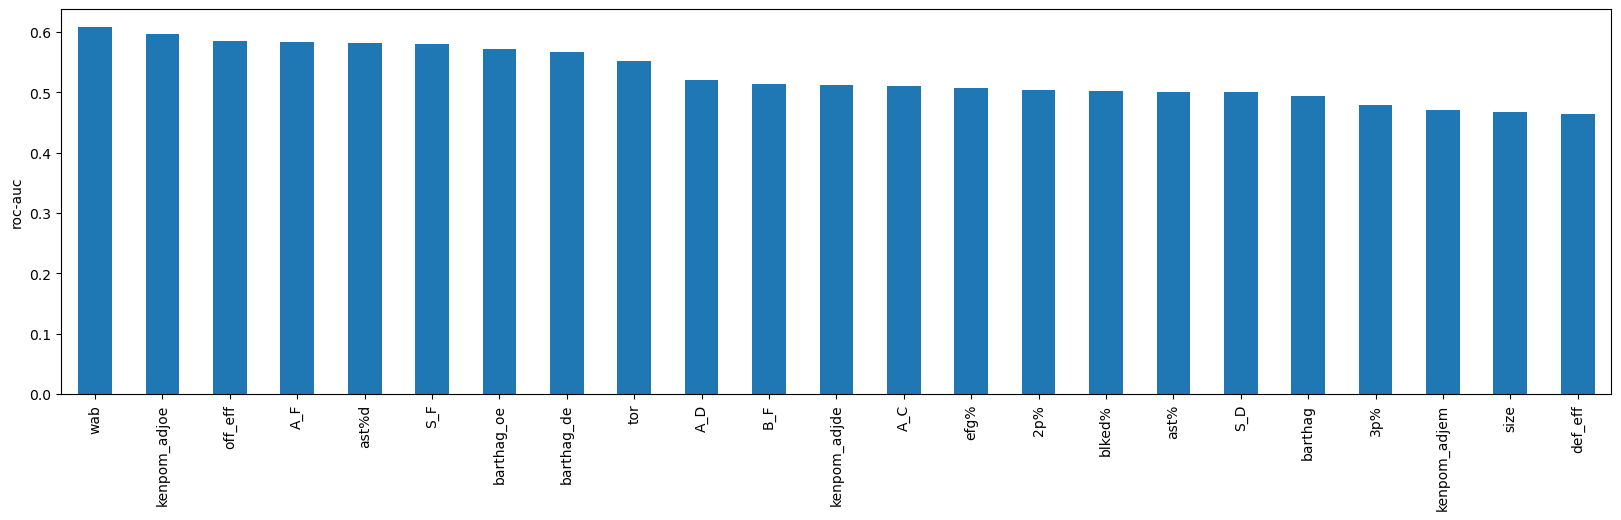

In [39]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [40]:
len(roc_values[roc_values > 0.5])

17

In [41]:
len(roc_values[roc_values > 0.6])

1

In [42]:
roc_values[roc_values > 0.5]

wab            0.6077
kenpom_adjoe   0.5969
kenpom_adjde   0.5126
barthag_oe     0.5714
barthag_de     0.5677
off_eff        0.5849
efg%           0.5076
tor            0.5519
2p%            0.5035
blked%         0.5024
ast%           0.5001
ast%d          0.5812
S_F            0.5794
A_C            0.5099
A_D            0.5197
A_F            0.5841
B_F            0.5140
dtype: float64

### Exhaustive Feature Selection

In [43]:
X_train_scaled2 = X_train_scaled[[
    'wab',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'tor', 
    '2p%', 
    '3p%',
    'blked%', 
    'ast%', 
    'ast%d', 
    'S_F',
    'A_C',
    'B_F'
]]

X_test_scaled2 = X_test_scaled[[
    'wab',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'tor', 
    '2p%', 
    '3p%',
    'blked%', 
    'ast%', 
    'ast%d', 
    'S_F',
    'A_C',
    'B_F'
]]

In [44]:
# Initialize variables to track the best model
log_reg = LogisticRegression(solver='liblinear')
best_f1 = 0
best_features = []
best_train_f1 = 0

# Iterate over all possible subsets of features
for k in range(1, len(X_train_scaled2.columns) + 1):
    for subset in combinations(X_train_scaled2.columns, k):
        X_train_subset = X_train_scaled2[list(subset)]
        X_test_subset = X_test_scaled2[list(subset)]
        
        # Train the model with the subset of features
        log_reg.fit(X_train_subset, y_train)
        
        # Make predictions on the test set
        y_test_pred = log_reg.predict(X_test_subset)
        test_f1 = f1_score(y_test, y_test_pred)
        
        # Make predictions on the training set
        y_train_pred = log_reg.predict(X_train_subset)
        train_f1 = f1_score(y_train, y_train_pred)
        
        # Track the best subset based on test F1 score
        if test_f1 > best_f1:
            best_f1 = test_f1
            best_features = subset
            best_train_f1 = train_f1

# Output the best feature subset and the F1 scores
print(f"Best Feature Subset: {best_features}")
print(f"Best Test F1 Score: {best_f1:.4f}")
print(f"Training F1 Score of Best Model: {best_train_f1:.4f}")

Best Feature Subset: ('tor', '3p%', 'ast%d')
Best Test F1 Score: 0.8631
Training F1 Score of Best Model: 0.8207


### V. XG Boost

In [45]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Set up hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4],
    'learning_rate': [0.001, 0.005, 0.01],
    'n_estimators': [100, 200, 300, 400, 500],
    'subsample': [0.4, 0.5, 0.6, 0.7],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.7],
    'gamma': [0, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_log_loss', cv=5, verbose=1, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train_scaled2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
Best Hyperparameters: {'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 500, 'subsample': 0.7}


In [46]:
# Retrain the model with the best parameters
best_xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    **best_params
)

best_xgb_model.fit(X_train_scaled2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [47]:
# Predict probabilities
y_pred_proba = best_xgb_model.predict_proba(X_test_scaled2)[:, 1]

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss on test set: {logloss}")

Log Loss on test set: 0.5101187857355307


In [48]:
# Predictions
y_train_pred = best_xgb_model.predict(X_train_scaled2)
y_test_pred = best_xgb_model.predict(X_test_scaled2)

# Calculate accuracy scores
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"F1 Score on Training Data: {f1_train:.2f}")
print(f"F1 Score on Test Data: {f1_test:.2f}")

F1 Score on Training Data: 0.90
F1 Score on Test Data: 0.78
